In [1]:
#SIR-ből SIR-D
import numpy as np

beta=3
gamma=1
mu=0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+(1-mu)*gamma*v_I[t]*dt
    v_D[t+1]=v_D[t]+mu*gamma*v_I[t]*dt

   # print('V_I: ', i, 'gamma*V_I[t]*dt', gamma*v_I[t]*dt)
#for i in v_I:
    

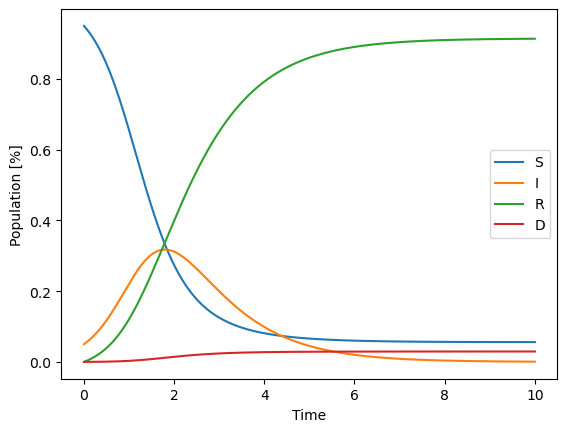

In [2]:
#SIRD diagram
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_10_1_0.01.png', bbox_inches='tight') #Ábra mentése

In [3]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.05051960999413467
Total number of infections:  0.9998927804733715
Maximum amount of infected people at the same time:  0.6754455121398604
Length of time when v_I(t)>t:  3.3539999999997416
